In [2]:
%pylab inline
import re
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [222]:
sns.set_style("darkgrid")
#sns.set_palette("hls")
mpl.rc("figure", figsize=(16,6))

In [333]:
V='H'
with open('incubator.log') as log:
    T,E,D,I,P,H=[],[],[],[],[],[]
    for line in log:
#        print line.strip()
        m=re.match(V+'r=(-?\d+\.\d+)', line)
        if m:
            T.append(float(m.group(1)))
        m=re.search('E'+V+'=(-?\d+\.\d+)', line)
        if m:
            E.append(float(m.group(1)))
        m=re.search('dE'+V+'dt=(-?\d+\.\d+)', line)
        if m:
            D.append(float(m.group(1)))
        m=re.search('IE'+V+'dt=(-?\d+\.\d+)', line)
        if m:
            I.append(float(m.group(1)))
        m=re.search('pid'+V+'=(-?\d+\.\d+)', line)
        if m:
            P.append(float(m.group(1)))
        m=re.search('V=(\d+.\d+)', line)
        if m:
            H.append(float(m.group(1)))

T,E,D,I,P,H=map(array,(T,E,D,I,P,H))
print len(T)

127


0.000466141732283 0.195383204019


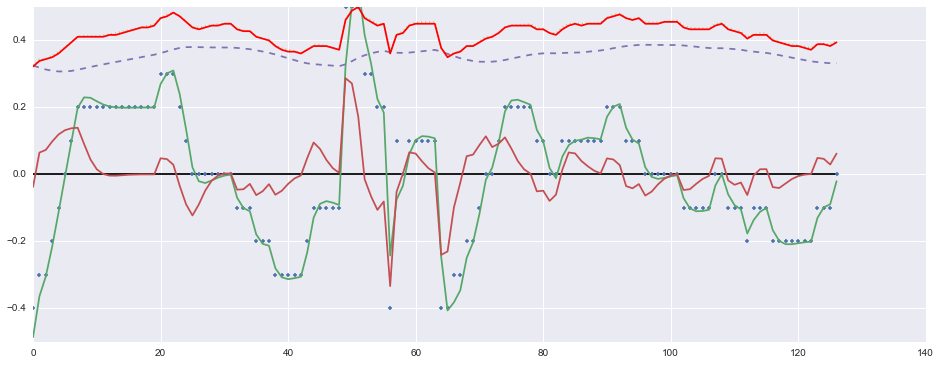

In [334]:
plot(T*0,'k')
plot(T-57,'.')
plot(E)
plot(D*2.75)
plot(I*0.009,'--')
#plot(E+10*D+2e-3*I,':')
plot(P,':')
plot(H*1,'r')
#xlim(0,3000)
ylim(-0.5,+0.5)
print E.mean(), E.std()

-0.447059867696 4.16319787531


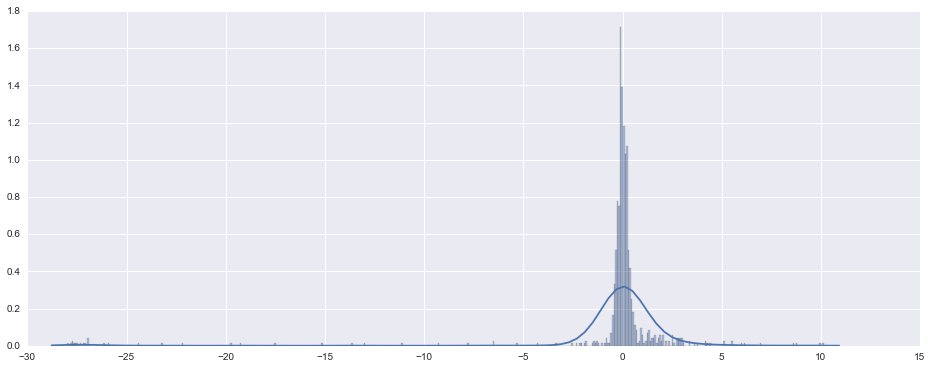

In [325]:
sns.distplot(E)
print E.mean(), E.std()

In [71]:
T=T-55

In [72]:
#T=T[7000:]

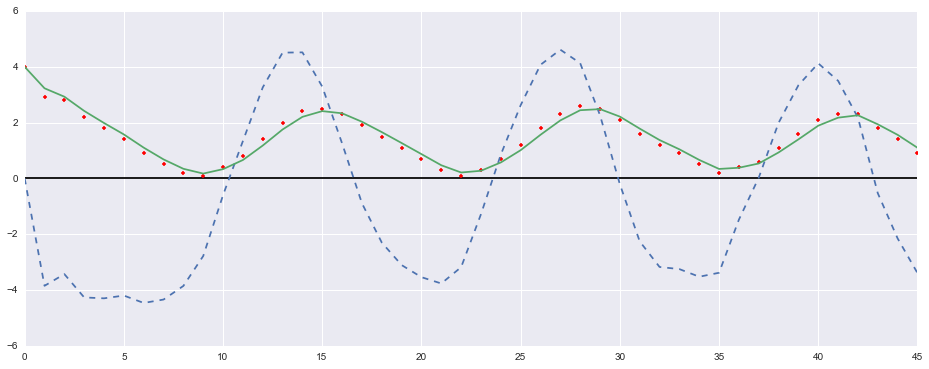

In [76]:
plot(T*0,'k')
plot(T,'r.')

S,B=[],[]

alpha, beta=0.7, 0.5
s, b=T[0], 0
for x in T:
    sn=alpha*x+(1-alpha)*(s+b)
    sn=alpha*x+(1-alpha)*s
    bn=beta*(sn-s)+(1-beta)*b
    s, b=sn, bn
    S.append(s)
    B.append(b)
S,B,D=map(array,(S,B,D))
plot(B*10,'--')
plot(S)
#plot(S+B*20,':')
#plot(S+D*20)
#plot((H-0.5)*0.5,'.')
#ylim(-0.5,0.5)